# Домашнее задание №1 (номера 1-3)

## Номер 1 (надо сфоткать)

![Задание 1, пункт a)](photos/zadanie1_1.jpg) 

![Задание 1, пункт a)](photos/zadanie1_2.jpg) 

![Задание 1, пункт a)](photos/zadanie1_3.jpg) 

![Задание 1, пункт a)](photos/zadanie1_4.jpg) 

![Задание 1, пункт a)](photos/zadanie1_5.jpg) 

![Задание 1, пункт b)](photos/zadanie1_6.jpg) 

## Номер 2

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import math
from sklearn.utils import resample

Согласно документации `np.random.rand` создает массив данной формы и заполните его случайными образцами из равномерного распределения по `[0, 1)`. Поэтому вычитая значения из 1 получим значения на интервале `(0, 1]`:

In [1050]:
n = 10
rand_0_1 = 1 - np.random.rand(n)
rand_0_1

array([0.7863542 , 0.12403806, 0.50984034, 0.41566684, 0.64628324,
       0.73284675, 0.06738002, 0.90302112, 0.25724385, 0.17905962])

In [ ]:
vyborka = -np.log(rand_0_1)
vyborka

array([0.24034796, 2.08716686, 0.67365766, 0.8778712 , 0.43651743,
       0.31081867, 2.6974068 , 0.10200934, 1.3577308 , 1.72003647])

Таким образом получили выборку.

### a) Определить по выборке моду, медиану, размах, оценку коэффициента ассиметрии.

Видно, что все элементы выборки являются модой:

In [1052]:
np.unique(vyborka, return_counts=True)

(array([0.10200934, 0.24034796, 0.31081867, 0.43651743, 0.67365766,
        0.8778712 , 1.3577308 , 1.72003647, 2.08716686, 2.6974068 ]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

Медиана:

In [1053]:
np.median(vyborka)

0.7757644290013597

Размах:

In [1054]:
np.max(vyborka) - np.min(vyborka)

2.595397459566607

Коэффициент ассиметрии:

In [1055]:
st.skew(vyborka)

0.6571193009491436

### b) Построить эмпирическую функцию распределения, гистограмму и boxplot

Эмпирическая функция

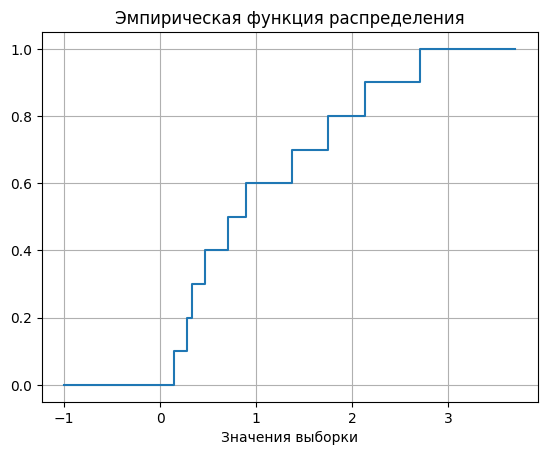

In [1056]:
emp_func = ECDF(vyborka)

x = np.linspace(-1, max(vyborka) + 1, 100)
y = emp_func(x)

plt.step(x, y, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения выборки')
plt.grid(True)
plt.show()

Гистограмма

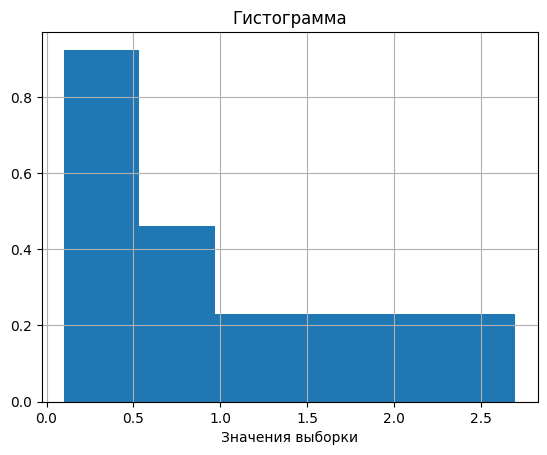

In [1057]:
k = round(1 + np.log2(25))
plt.hist(vyborka, bins=k, density=True)
plt.title('Гистограмма')
plt.xlabel('Значения выборки')
plt.grid(True)
plt.show()

BoxPlot

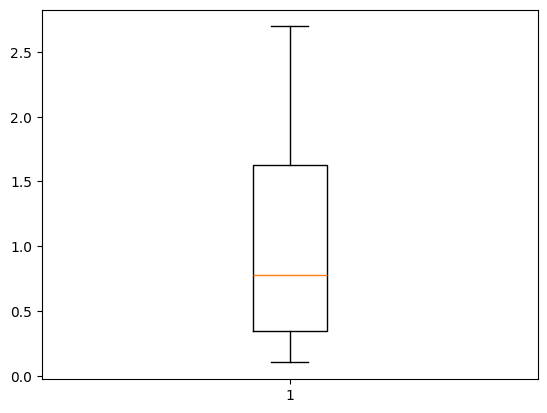

In [1058]:
plt.boxplot(vyborka)
plt.show()

### c) Сравнить оченку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности.

Состоятельность бутстраповской оценки зависит от того, насколько репрезентативна была наша начальная выборка. В некоторых случаях эта плотность может быть сильно сдвинута (или с нарушенной геометрией)

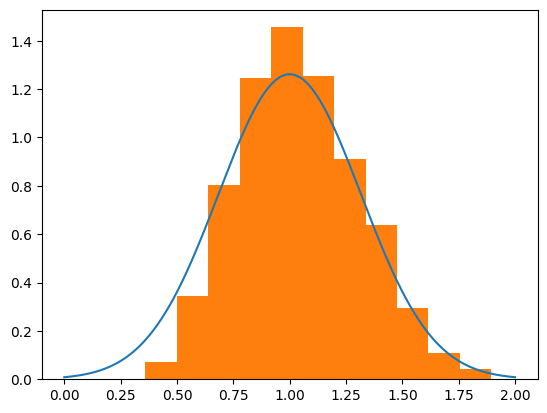

In [1059]:
m = 1 # предварительно вычислил матожидание для изначального распределения
d = 1 # тоже предварительно посчитал
x = np.linspace(0, 2, 1000)
y = st.norm.pdf(x, m, (d/n)**0.5)
plt.plot(x, y)


medians = [np.mean(resample(vyborka, replace=True, n_samples=n)) for i in range(1000)]
k = round(1 + np.log2(1000))
plt.hist(medians, density=True, bins=k)
plt.show()

### d) Найти бутстраповскую оценку плотности распределения коэффициетна асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.

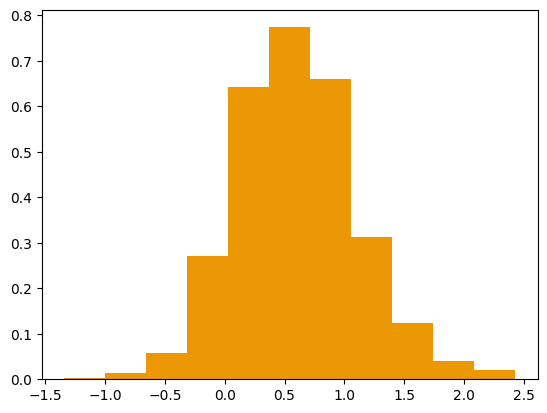

In [1060]:

asim_koefs = [st.skew(resample(vyborka, replace=True, n_samples=n)) for i in range(1000)]
k = round(1 + np.log2(1000))
plt.hist(asim_koefs, density=True, bins=k, color='#EC9704')
plt.show()

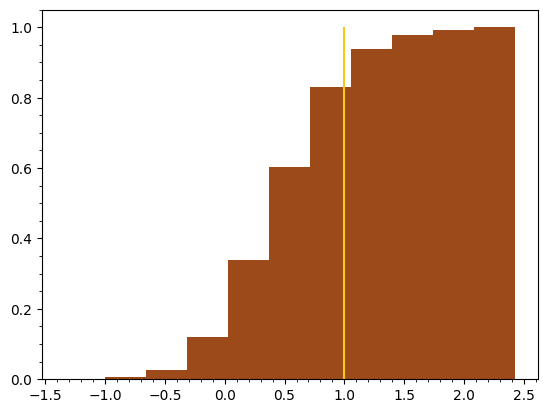

вероятность, что коэффициент ассиметрии < 1, равна:  0.8299999999999998


In [1061]:
hist = plt.hist(asim_koefs, density=True, bins=k, cumulative=True, color='#9C4A1A')
plt.minorticks_on()
plt.vlines(x=1, ymin=0, ymax=1, colors='#F7C815')
plt.show()
print('вероятность, что коэффициент ассиметрии < 1, равна: ', hist[0][np.argmin(hist[1] <= 1) -1])

Вероятность того, что коэффициет ассиметрии будет меньше чем 1, равна 0.83

### e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности.

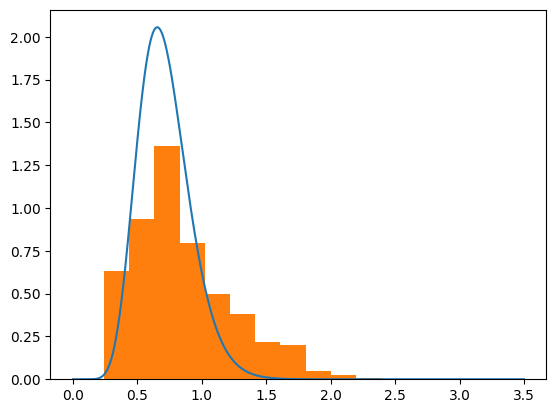

In [1100]:
x = np.linspace(0, 3.5, 1000)
y = 25*np.exp(-x)* 2704156 * np.exp(-x)**12 * (1 - np.exp(-x))**12
plt.plot(x, y)


medians = [np.median(resample(vyborka, replace=True, n_samples=n)) for i in range(1000)]
k = round(1 + np.log2(1000))
plt.hist(medians, density=True, bins=k)
plt.show()

Комментарий: то, на сколько хорошо отрабатывают методы с использованием bootstrap, зависит от начальной выбоки. Если она была достаточно репрезентативна (это можно проверить по гистограмме: хорошая репрезентативная выборка хорошо приближает плотность гистограммой; или по эмпирической функции распределения: она должно достаточно хорошо приближать функцию распределения), все метды могут дать хорошие оценки плотностей среднего арифметического, коэффициента ассиметрии и медианы.

## Номер 3

![Задание 3, пункт a)](photos/zadanie3_1.jpg) 

![Задание 2, пункт b)](photos/zadanie3_2.jpg) 

![Задание 2, пункт c)](photos/zadanie3_3.jpg) 